In [1]:
import torch
import random
import matplotlib.pyplot as plt
import tqdm

## This function generates a dataset for us

In [31]:
def generate_data(w, b, data_size, mean=0, std=1):
    X = torch.normal(mean, std, size=(data_size, len(w)))
    Y = torch.matmul(X, w) + b 
    Y += torch.normal(0, 0.1, size=Y.shape)
    return X, Y.reshape((-1, 1))

## Let's create a new dataset

In [32]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
X, Y = generate_data(true_w, true_b, 50000)

## When we visualize it we can easily observer that it has a linear relation

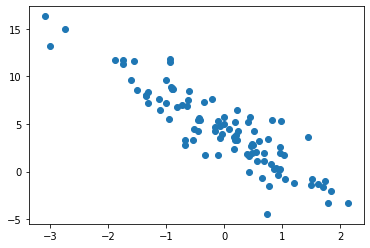

In [33]:
plt.scatter(X[:100,1], Y[:100])

## Let's create our training Batch function

In [34]:
def train_batch(batch_size, X, Y):
    data_size = X.shape[0]
    indices = list(range(data_size))
    random.shuffle(indices)
    for idx in range(0, data_size, batch_size):
        batch_indices = torch.tensor(indices[idx:min(idx+batch_size, data_size)])
        yield X[batch_indices], Y[batch_indices]
 
    

## Intialize model paramters

In [35]:
w = torch.normal(0, 1, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## Define our model and implement loss and sgd functions

In [36]:
def linear_reg_model(X, w, b):
    return torch.matmul(X, w) + b

In [37]:
def squared_error(y_pred, y):
    return 0.5  * (y.reshape(y_pred.shape)-y_pred) ** 2

In [38]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data.sub_(lr * param.grad / batch_size)
        param.grad.data.zero_()

## Main Training Loop

In [44]:
lr = 0.03
num_epochs = 20
net = linear_reg_model
loss = squared_error
batch_size = 64
for i in range(num_epochs):
    for x, y in train_batch(batch_size, X, Y):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        sgd([w, b], lr , batch_size)
    with torch.no_grad():
        train_l = loss(net(X, w, b), Y)
        print(f'epoch {i + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.004967
epoch 2, loss 0.004966
epoch 3, loss 0.004969
epoch 4, loss 0.004966
epoch 5, loss 0.004967
epoch 6, loss 0.004965
epoch 7, loss 0.004964
epoch 8, loss 0.004964
epoch 9, loss 0.004967
epoch 10, loss 0.004965
epoch 11, loss 0.004968
epoch 12, loss 0.004965
epoch 13, loss 0.004965
epoch 14, loss 0.004972
epoch 15, loss 0.004967
epoch 16, loss 0.004967
epoch 17, loss 0.004964
epoch 18, loss 0.004965
epoch 19, loss 0.004965
epoch 20, loss 0.004973


## Model learned paramters

In [41]:
print(w, "\n",b)

tensor([[ 2.0024],
        [-3.3988]], requires_grad=True) 
 tensor([4.2016], requires_grad=True)
